Neuromorphic engineering I

## Lab 2: Transistor superthreshold saturation current and drain characteristics

Group number: 10

Team member 1: Pascal Dominic Müller

Team member 2: Sufyan Zakeeruddin

Date: 12.10.22

-------------------------------------------------------------------------------------------------------------------

The objective of this lab is to understand _super-threshold_ ( also called _above-threshold_ or _strong inversion_ ) transistor operation and to understand transistor drain conductance characteristics, particularly _channel length modulation_.

The specific experimental **objectives of this lab**  are as follows: 
1. To characterize drain current of a transistor as a function of gate voltage in superthreshold operation in the ohmic (triode) and saturation regions.
2. To characterize the drain saturation properties in super-threshold.
3. To characterize drain conductance (the Early effect) and how it scales with transistor length (may not be possible this year) and saturation drain current.

An intuitive and quantitative understanding of all these effects, along with the subthreshold behavior (next week), is useful for the design of effective circuits, especially analog design of high performance amplifiers.

# 1 Terminology

- above-threshold = super-threshold =  strong inversion
- sub-threshold = below-threshold = weak inversion
- triode region = ohmic region = linear drain conductance behavior with small drain-source voltage
- saturation = large $V_{\rm ds}$ 
- overdrive = $V_{\rm g}-V_{\rm T}$
- $U_{\rm T} = kT/q$ = thermal voltage = 25mV at room temperature
- $V_{\rm T}$ = threshold voltage = 0.4V to 0.8V depending on process


# 2 Useful Quantities

The following is a list of the physical parameters and constants we
will be referring to in this lab, along with their values when
appropriate. The units that are most natural for these quantities are
also included; these units are not self--consistent, so make sure you
convert the units when appropriate.


$\epsilon_0$ :  Permittivity of vacuum = $8.86\times10^{-12} \rm{ F/m}$ 

$\epsilon_{Si}$ : Relative permittivity of ${\rm Si}$ = $11.7\epsilon_0$ 

$\epsilon_{ox}$ : Relative permittivity of ${\rm SiO_2}$ = $3.9\epsilon_0$ 

$\mu_n$ : electron surface mobility, ${\rm cm^2/V/s}$ 
 
$\mu_p$ : hole surface mobility, ${\rm cm^2/V/s}$

$C_{ox}$ : gate capacitance across the oxide per unit area,
	${\rm fF/\mu m^{2}}$ 

$C_{dep}$ : capacitance of depletion region per unit area,
	${\rm fF/\mu m^{2}}$ 

$t_{ox}$ : gate oxide thickness $\approx$
	3.8 nm for the class chip in 180 nm techology.
	
$V_T$ : threshold voltage, V ($V_{T0}$ is $V_T$ when $V_s$ = 0).


$W$ : electrical width of transistor channel, $= 4~\mu$m for both devices in this lab 

$L$ : electrical length of transistor channel, $= 4~\mu$m for both devices in this lab

$\beta$ $\equiv \mu C_{ox} W/L,\;\mu{\rm A/V^2}$ 

$V_E$ : Early voltage, characterizes drain conductance. 


# 3 Prelab

Write the expressions/eqations in LaTeX, like $Vod$ = $V_{\rm g}-V_{\rm T}$, or upload the pictures of handwritten expressions.

* For nFET, write the most general expression for $I_{ds}$ above threshold in terms of $V_g,\;V_s,\;V_d$ (all voltages are referenced to the bulk), and the parameters and constants given above. Leave out the drain conductance Early effect in this equation. Assume $\kappa=1$ and that $V_{Tn}>0$.

On slide 45 we see

$$
    I_{ds} = \frac{\mu_n}{2}C_{ox}\frac{W}{L}\frac{1}{\kappa}
    \bigg[
          \bigg(\kappa(V_g - V_{T0}) - V_s\bigg)^2
          - \bigg(\kappa(V_g - V_{T0}) - V_d\bigg)^2
    \bigg]
    \tag{1}
$$

* For pFET, write the most general expression for $I_{ds}$ above threshold in terms of $V_g,\;V_s,\;V_d$ (all voltages are referenced to the bulk), and the parameters and constants given above. Leave out the drain conductance Early effect in this equation. Assume $\kappa=1$ and that $V_{Tp}<0$.

On slide 45 we see

$$
    I_{ds} = \frac{\mu_n}{2}C_{ox}\frac{W}{L}\frac{1}{\kappa}
    \bigg[
          \bigg(\kappa(- V_g + V_{dd}) + V_s\bigg)^2
          - \bigg(\kappa(- V_g + V_{dd}) + V_d\bigg)^2
    \bigg]
    \tag{2}
$$

- For nFET, sketch graphs of $I_{ds}$ vs the $V_d$ for several gate voltages $V_g$ above threshold, with $V_s=0$. Indicate the ohmic and saturation regions and the behavior of the saturation voltage $V_{dsat}$ as the gate overdrive voltage increases. 

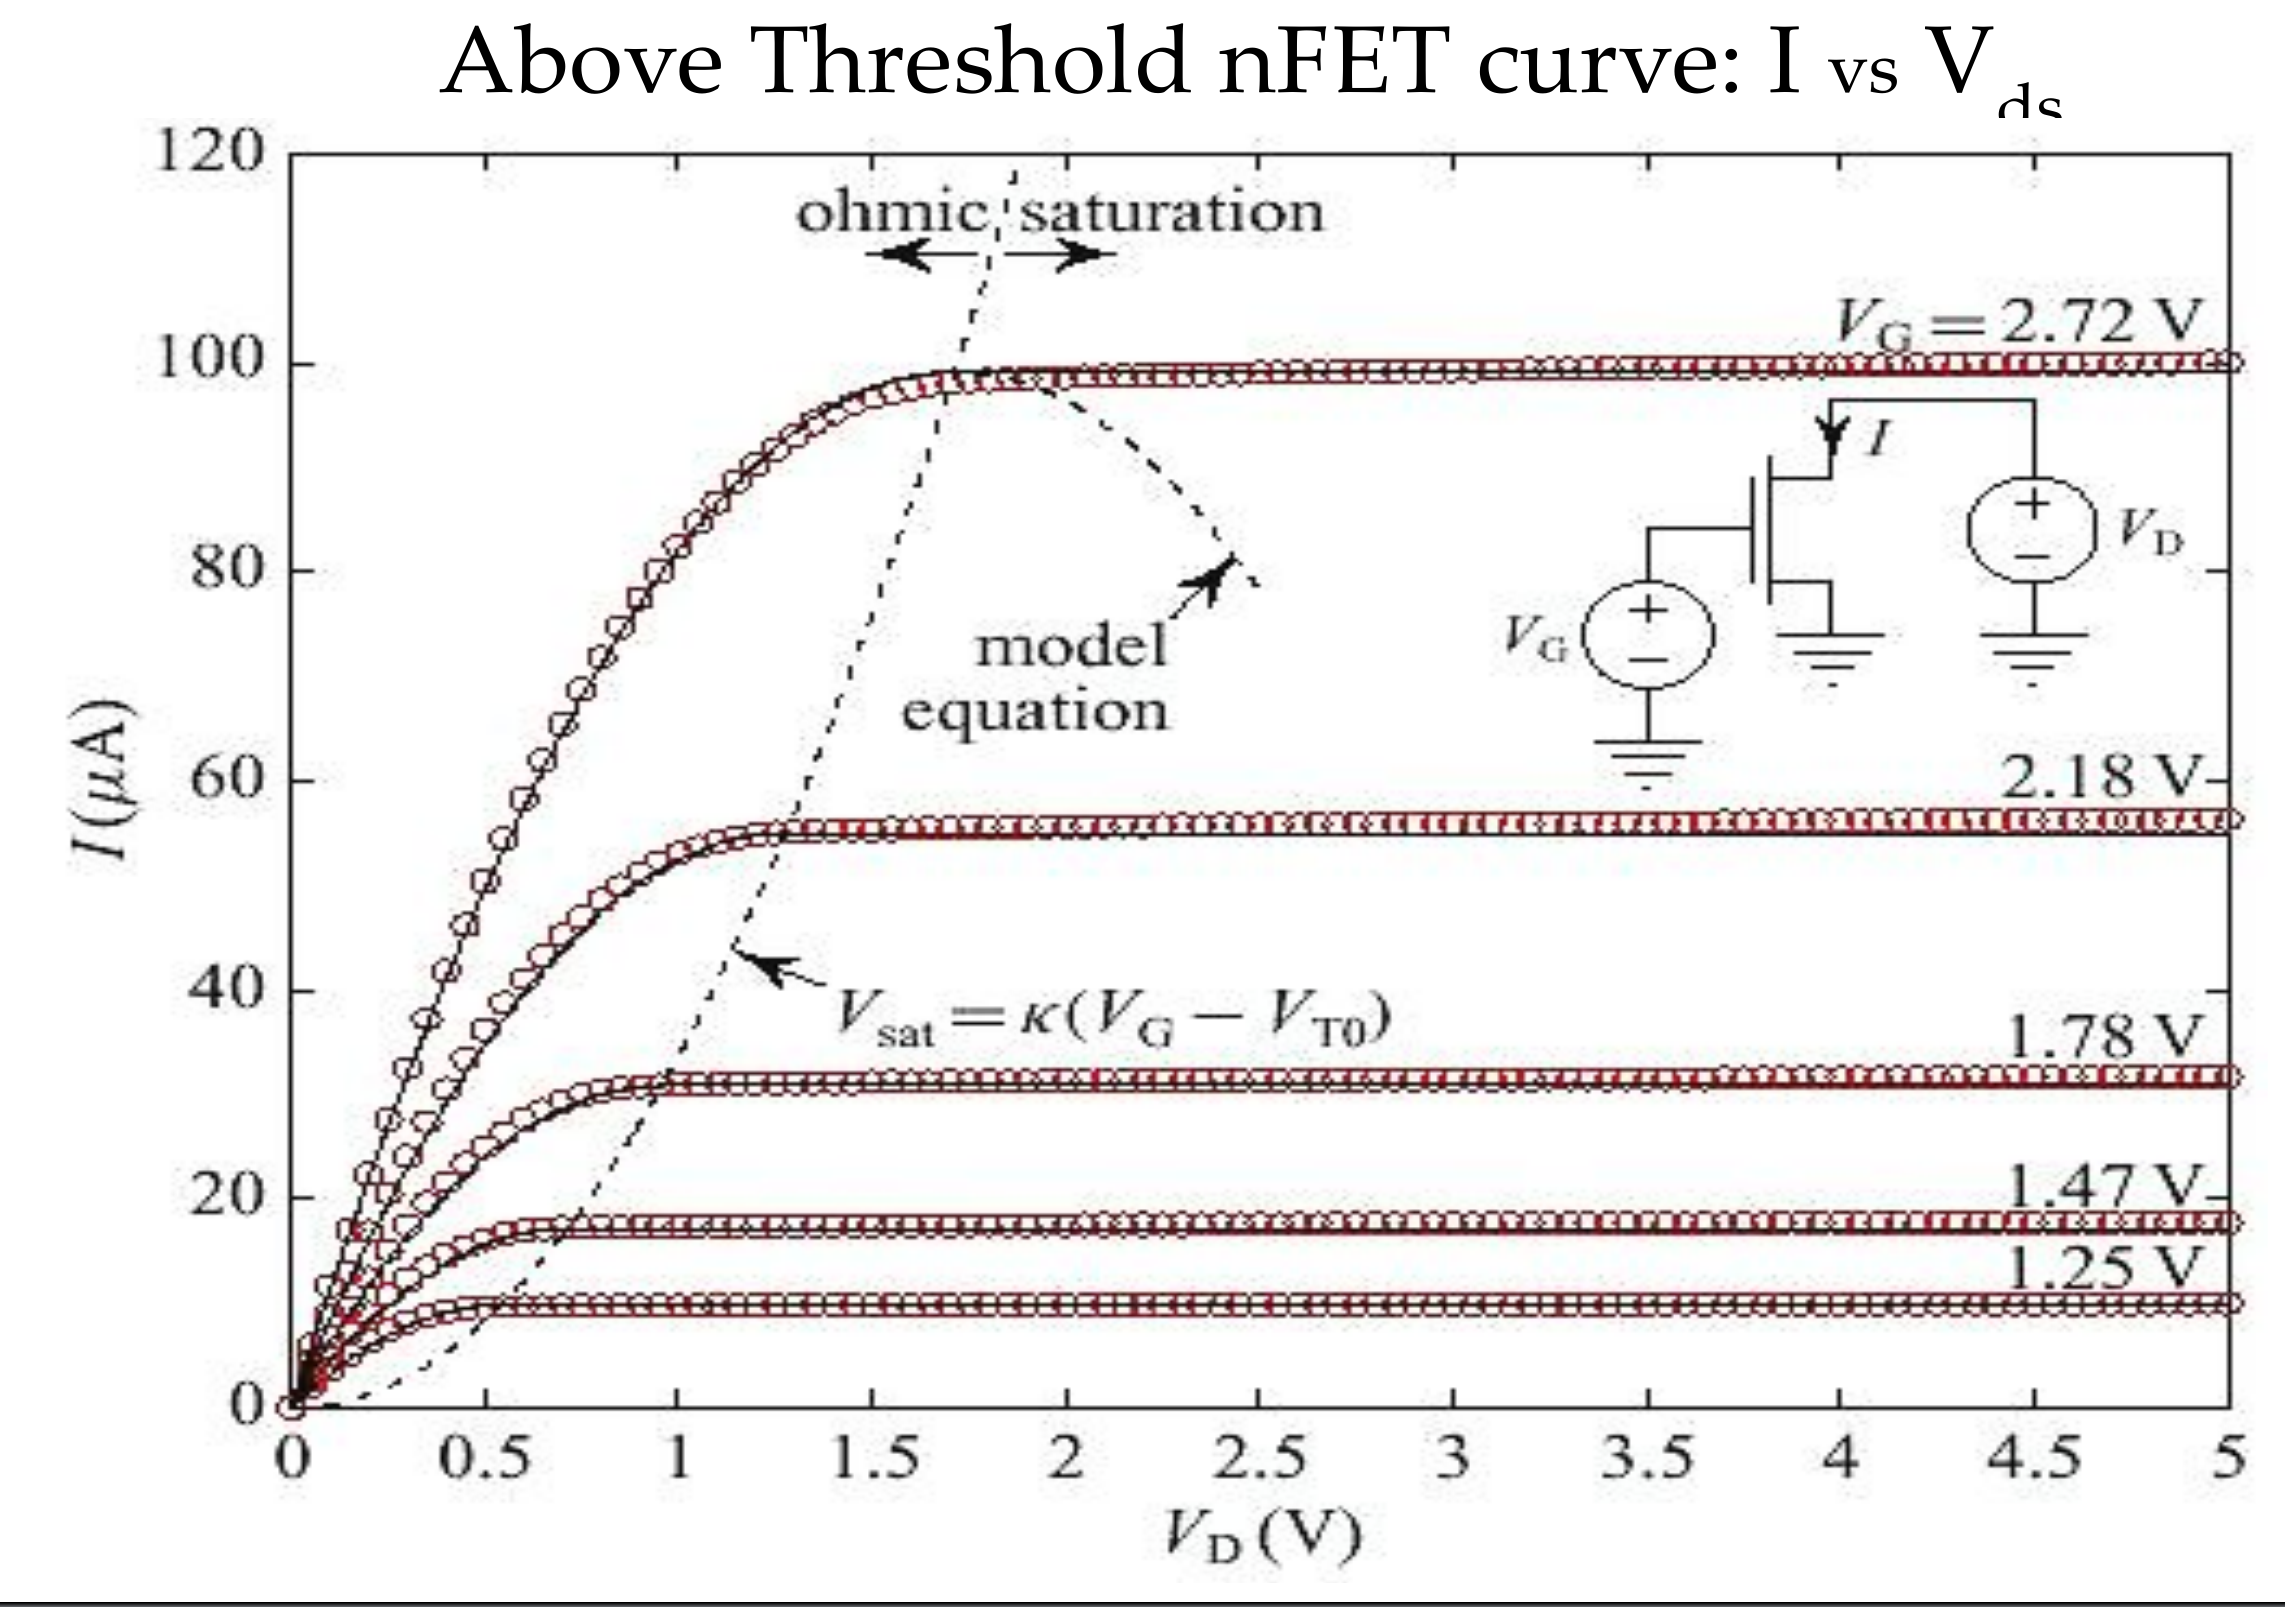

- For nFET, derive an expression for the current $I_{ds}$ in the ohmic region in terms of $V_g$ and $V_{ds} \equiv V_d-V_s,$. You may assume that $V_s=0.$ Sketch a graph of $I_{ds}$ vs $V_g,$ showing $V_{T0}$ and an expression for the slope.

From Slide 30 and 31:
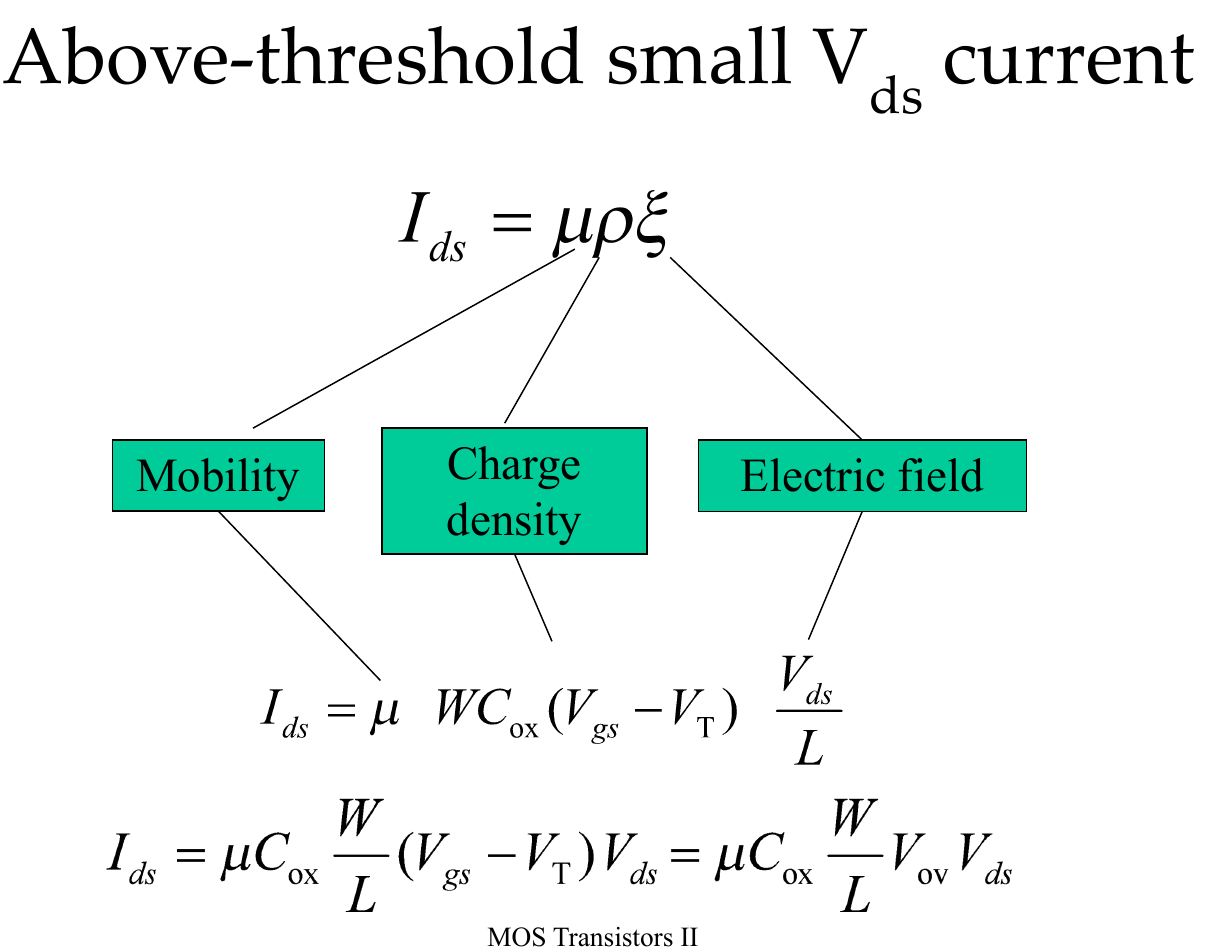
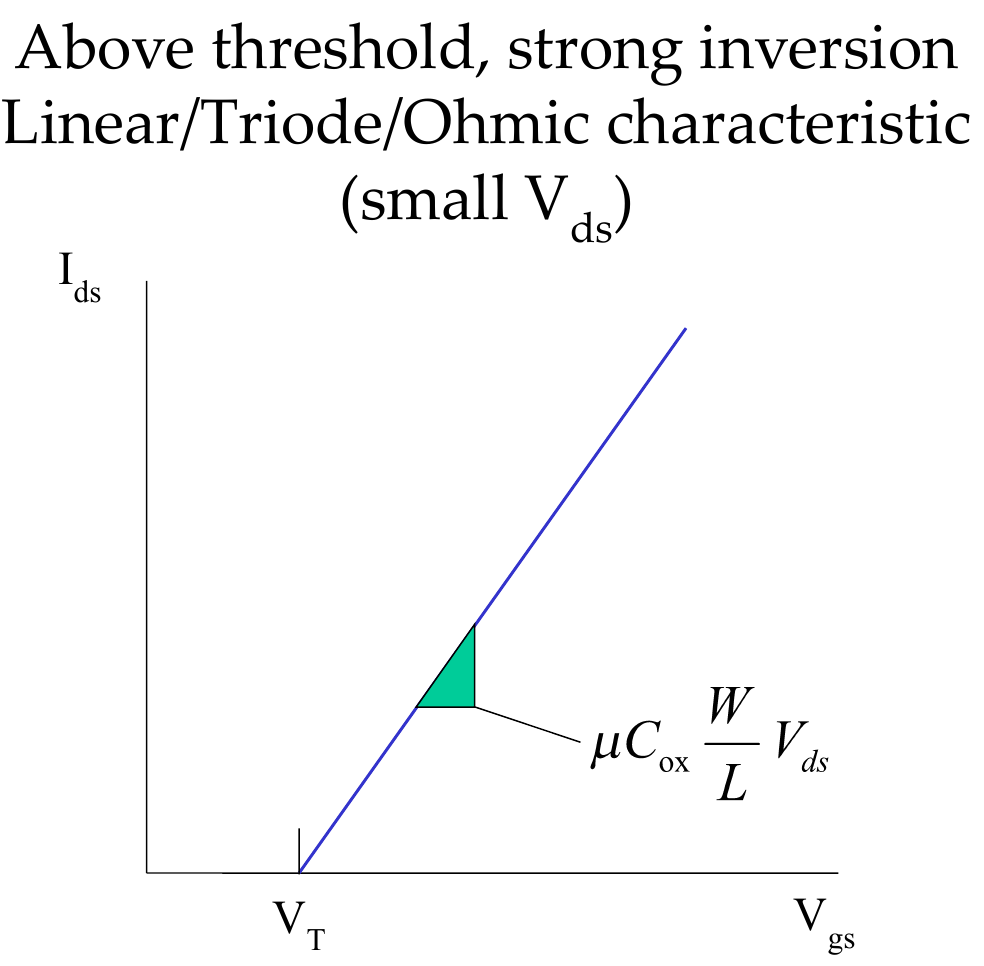

From Slide 30 and 31:
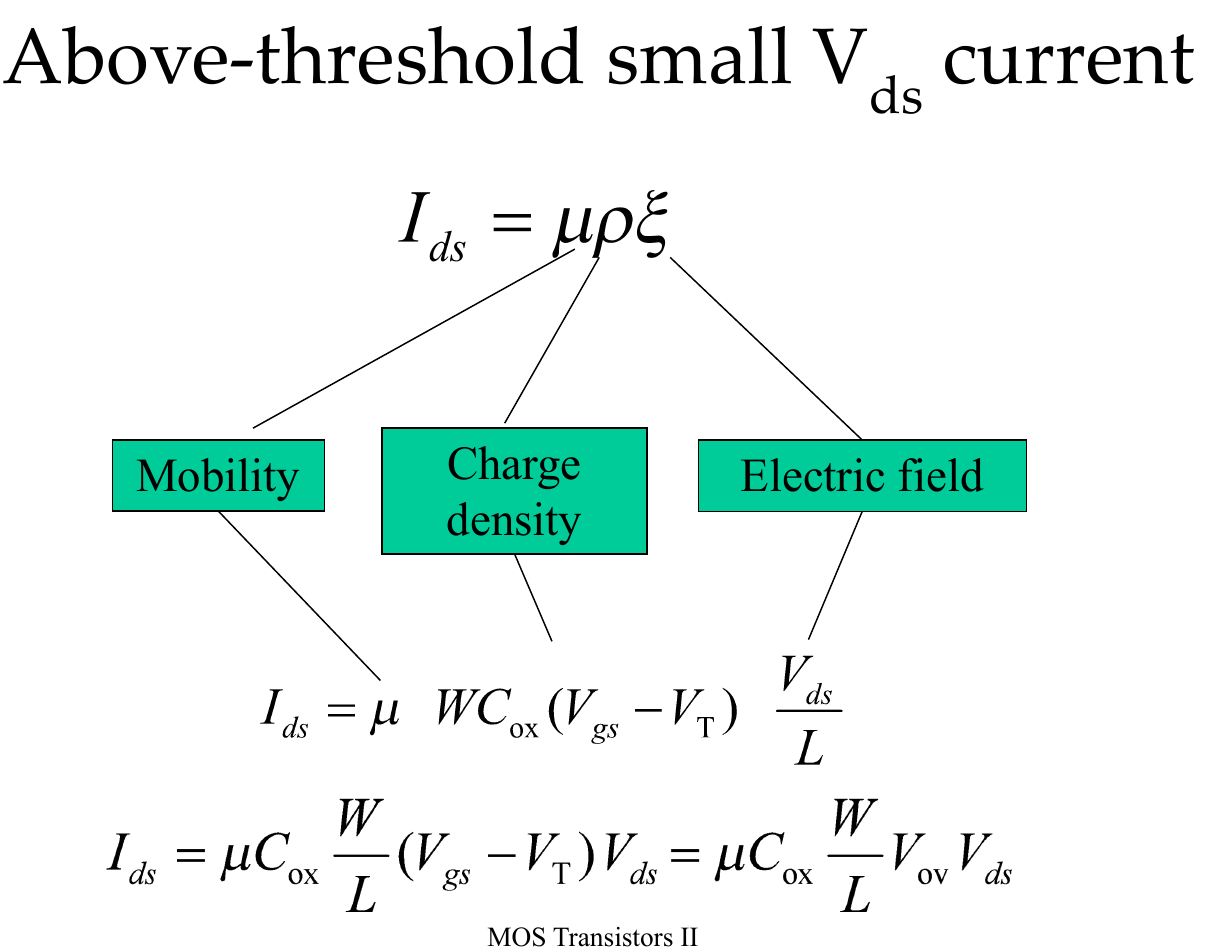
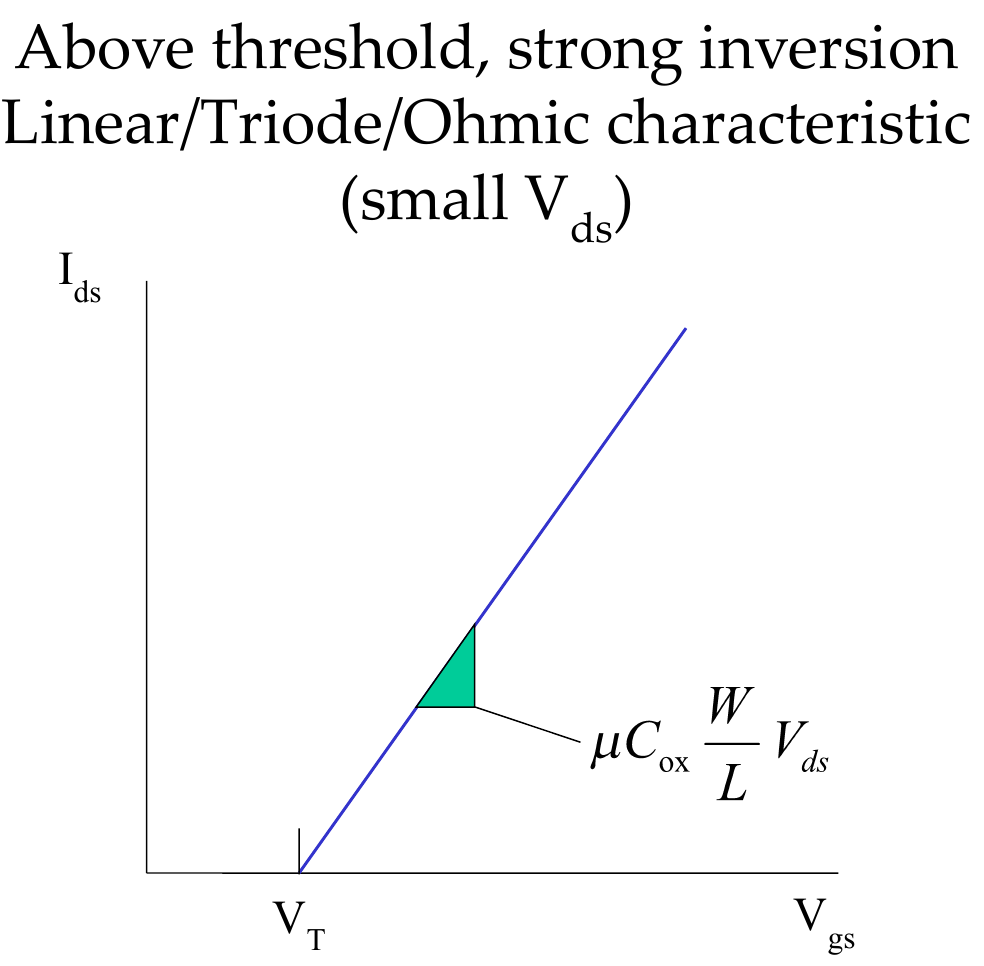

- For nFET, state the drain voltage condition for above-threshold saturation and derive an expression for the saturation current $I_{dsat}$ in terms of $V_g$. Sketch a graph of $\sqrt{I_{dsat}}$ vs $V_g$ with $V_s=0,$ showing $V_{T0}$ and an expression for the slope. Do not consider the Early effect here.

- Calculate $C_{ox}$ for the classchip from the values given above. What is $C_{ox}$ per square micron in fF?


- Write the expression for the drain current in saturation including the Early effect, using $I_{dsat}$ to  represent the saturation current in the absence of the Early effect.  Use $V_E$ to represent the Early voltage.

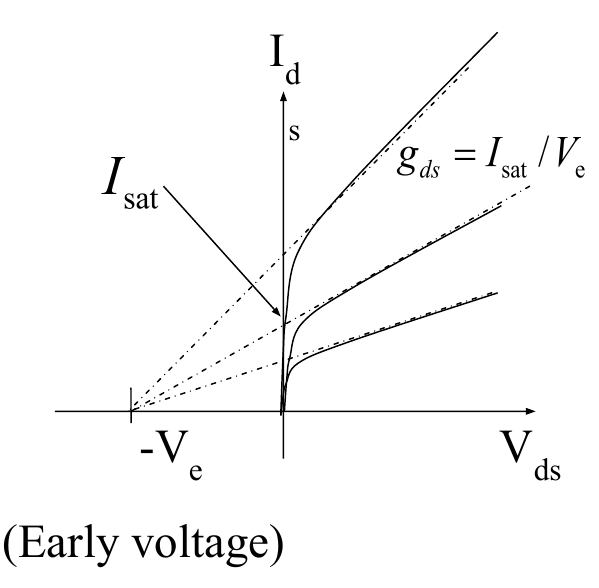

# 4 Setup

## 4.1 Connect the device

In [8]:
# import the necessary library to communicate with the hardware

import pyplane
import time
import matplotlib.pyplot as plt

del p

In [9]:
# create a Plane object and open the communication
if 'p' not in locals():
    p = pyplane.Plane()
    try:
        p.open('/dev/ttyACM0') # Open the USB device ttyACM0 (the board). 
    except RuntimeError as e:
        print(e)
        
# Note that if you plug out and plug in the USB device in a short time interval, the operating system might allocate a new name like ttyACM1, 
# then you may get error messages with open(...ttyACM0). So please avoid frenquently plugging in/out the board.

In [10]:
p.get_firmware_version()   #firmware version should be 1.8.3

(1, 8, 6)

In [11]:
# Send a reset signal to the board, check if the LED blinks
p.reset(pyplane.ResetType.Soft)

time.sleep(1) 
# NOTE: You must send this request events every time you do a reset operetion, otherwise the recieved data is noisy.
# Because the class chip need to do handshake to get the communication correct.
p.request_events(1)

In [12]:
# Try to read something, make sure the chip responses
p.read_current(pyplane.AdcChannel.GO0_N)

1.4501952705359145e-07

In [11]:
# If any of the above steps fail, delete the object, and restart the kernel

# del p

<a id='config_nfet'></a>
## 4.2 Configurations for N-FET

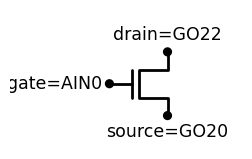

In [107]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.NFet, reverse=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.drain, toplabel='drain=GO22')
d.add(elm.Dot, xy=Q.source, botlabel='source=GO20')
d.draw()

To cancel out the leakage current and shunt resistance, you may need to do a subtraction in Section 5.1.

$I_{ds} = I_{GO20} - I_{GO20}|_{V_{gs} = 0}$ 

Note: It's better to measure source because its leakage is constant in this lab

* You have to set the input voltage demultiplexer by sending a configuration event:

In [39]:
# Configure NFET, set the input voltage demultiplexer by AER event. 
# Note selectlines we should choose for the NFET
events = [pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.NoneSelected, \
    pyplane.Coach.VoltageInputSelect.SelectLine2, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)]

p.send_coach_events(events)

* Check the configuration is correct. If the measured result is not as expected, try sending the configration event again.

In [16]:
# set source voltage
vs = 0.0
p.set_voltage(pyplane.DacChannel.GO20,vs)       
print("The source voltage is set to {} V".format(vs))

The source voltage is set to 0.0 V


In [17]:
# set drain voltage
vd = 1.8
p.set_voltage(pyplane.DacChannel.GO22,vd)
print("The drain voltage is set to {} V".format(vd))

The drain voltage is set to 1.8 V


In [22]:
# set gate voltage
vg = 1
p.set_voltage(pyplane.DacChannel.AIN0, vg)
print("The gate voltage is set to {} V".format(vg))

The gate voltage is set to 1 V


In [23]:
# read I_{ds}
I_s = p.read_current(pyplane.AdcChannel.GO20_N)      #source: note the pin name is different from the Dac
print("The measured source current is {} A".format(I_s))

time.sleep(0.1)  # wait for it to settle

I_d = p.read_current(pyplane.AdcChannel.GO22)       #drain
print("The measured drain current is {} A".format(I_d))

print("Currents differ because of electronics")

The measured source current is 1.9482422430883162e-05 A
The measured drain current is 1.9482422430883162e-05 A
Currents differ because of electronics


* Question: Check if the measured currents change with different gate voltages?

<a id='config_pfet'></a>
## 4.3 Configurations for P-FET

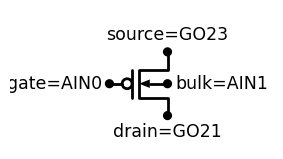

In [17]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.PFet, reverse=True, bulk=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.bulk, rgtlabel='bulk=AIN1')
d.add(elm.Dot, xy=Q.drain, botlabel='drain=GO21')
d.add(elm.Dot, xy=Q.source, toplabel='source=GO23')
d.draw()

Hint: To cancel out the leakage current and shunt resistance, you may need to do a subtraction:

$I_{ds} = I_{GO23} - I_{GO23}|_{V_{gs} = 0} $

Note: Measure drain of PFET in this lab. 
Also think about the difference of $V_{gs}$ between PMOS and NMOS?

* You have to choose the input voltage demultiplexer by sending a configuration event (make sure LED1 blinks):

In [51]:
# Configure PFET, set the input voltage demultiplexer by AER event. 
# Note selectlines we should choose for the PFET
events = [pyplane.Coach.generate_aerc_event( \
    pyplane.Coach.CurrentOutputSelect.SelectLine5, \
    pyplane.Coach.VoltageOutputSelect.NoneSelected, \
    pyplane.Coach.VoltageInputSelect.SelectLine1, \
    pyplane.Coach.SynapseSelect.NoneSelected, 0)]

p.send_coach_events(events)

* Check the configuration is correct. If the measured result is not as expected, try sending the event again.

In [137]:
# set trial voltages
# set bulk voltage
p.set_voltage(pyplane.DacChannel.AIN1, 1.8)
Vb_p = p.get_set_voltage(pyplane.DacChannel.AIN1)
print("The bulk voltage is set to {} V".format(Vb_p))
time.sleep(0.1)  # wait 0.1s for it to settle

# set source voltage
p.set_voltage(pyplane.DacChannel.GO23, 1.8)
Vs_p = p.get_set_voltage(pyplane.DacChannel.GO23)
print("The source voltage is set to {} V".format(Vs_p))
time.sleep(0.1)  # wait 0.1s for it to settle

# set drain voltage
p.set_voltage(pyplane.DacChannel.GO21, 0)
Vd_p = p.get_set_voltage(pyplane.DacChannel.GO21)
print("The drain voltage is set to {} V".format(Vd_p))
time.sleep(0.1)  # wait for it to settle

# set gate voltage
p.set_voltage(pyplane.DacChannel.AIN0, 1)
Vg_p = p.get_set_voltage(pyplane.DacChannel.AIN0)
print("The gate voltage is set to {} V".format(Vg_p))

The bulk voltage is set to 1.7982406616210938 V
The source voltage is set to 1.7982406616210938 V
The drain voltage is set to 0.0 V
The gate voltage is set to 0.9994136095046997 V


In [138]:
# read I_{ds}
Is_p = p.read_current(pyplane.AdcChannel.GO21_N)
print("The measured source current of PMOS is {} A".format(Is_p))

time.sleep(0.1)  # wait for it to settle

Id_p = p.read_current(pyplane.AdcChannel.GO23)
print("The measured drain current of PMOS is {} A".format(Id_p))

The measured source current of PMOS is 1.8554687812866177e-06 A
The measured drain current of PMOS is 6.39648442302132e-06 A


# 5 Ohmic region

In this experiment you will characterize the *linear* dependence of the current on the gate
voltage in the strong-inversion ohmic region.

## 5.1 N-FET

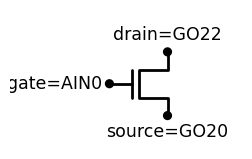

In [21]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.NFet, reverse=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.drain, toplabel='drain=GO22')
d.add(elm.Dot, xy=Q.source, botlabel='source=GO20')
d.draw()

**(a)** Configure the chip following [Section 4.2](#config_nfet) if you haven't

**(b)** Measure $I_{ds}$ as a function of $V_g$ in ohmic region

In [ ]:
# Configure NFET, set the input voltage demultiplexer by AER event. 


* What will be the fixed value for source and drain voltages?

Answer: We fix source at 0 V. The drain should be below its saturation voltage of $V_g - V_t = 1 - 0.8 = 0.2 V$

In [40]:
# set source voltage

vs = 0.0
p.set_voltage(pyplane.DacChannel.GO20,vs)       
print("The source voltage is set to {} V".format(vs))

The source voltage is set to 0.0 V


In [41]:
# set drain voltage

vd = 0.05
p.set_voltage(pyplane.DacChannel.GO22,vd)       
print("The source voltage is set to {} V".format(vd))

The source voltage is set to 0.05 V


* For very close voltages, you may want to call `get_set_voltage` to check the actual output of the DAC.

In [42]:
# get set voltage
Vs_n = p.get_set_voltage(pyplane.DacChannel.GO20)
print("The source voltage is set to {} V".format(Vs_n))

time.sleep(0.1)  # wait for it to settle

# get set voltage
Vd_n = p.get_set_voltage(pyplane.DacChannel.GO22)
print("The drain voltage is set to {} V".format(Vd_n))

The source voltage is set to 0.0 V
The drain voltage is set to 0.04926686733961105 V


* Data aquisition

In [43]:
# sweep gate voltage
import time
import numpy as np 

# Get the leakage current, Read Ids=Ids0 at Vg = 0
p.set_voltage(pyplane.DacChannel.AIN0, 0)
time.sleep(0.5) # wait 0.5 second for it to settle
Is0_n = p.read_current(pyplane.AdcChannel.GO20_N) #REMEMBER: reading from source is pin AdcChannel.GO20_N
print("Offset Is0_n: {} A".format(Is0_n))

N_max = 20
vg_sweep_range = np.linspace(0.0, 1.5, N_max)
print(vg_sweep_range)
I_ds = []

for n, vg_sweep in enumerate(vg_sweep_range):
    # set gate voltage
    p.set_voltage(pyplane.DacChannel.AIN0, vg_sweep)

    
    print("The gate voltage is set to {} V".format(vg_sweep))   ## print the gate voltage
    
    time.sleep(0.05)  # wait for it to settle
    # read I_{ds}
    I_ds_tmp = p.read_current(pyplane.AdcChannel.GO20_N)
    
    print("The measured source current is {} A".format(I_ds_tmp))  ## print the raw data
    
    # substract leakage current 
    I_ds.append(I_ds_tmp - Is0_n)

print(vg_sweep, I_ds)

Offset Is0_n: 2.4414063659605745e-07 A
[0.         0.07894737 0.15789474 0.23684211 0.31578947 0.39473684
 0.47368421 0.55263158 0.63157895 0.71052632 0.78947368 0.86842105
 0.94736842 1.02631579 1.10526316 1.18421053 1.26315789 1.34210526
 1.42105263 1.5       ]
The gate voltage is set to 0.0 V
The measured source current is 2.4414063659605745e-07 A
The gate voltage is set to 0.07894736842105263 V
The measured source current is 2.4414063659605745e-07 A
The gate voltage is set to 0.15789473684210525 V
The measured source current is 2.4414063659605745e-07 A
The gate voltage is set to 0.23684210526315788 V
The measured source current is 2.4414063659605745e-07 A
The gate voltage is set to 0.3157894736842105 V
The measured source current is 2.4414063659605745e-07 A
The gate voltage is set to 0.39473684210526316 V
The measured source current is 2.4414063659605745e-07 A
The gate voltage is set to 0.47368421052631576 V
The measured source current is 2.4414063659605745e-07 A
The gate voltage i

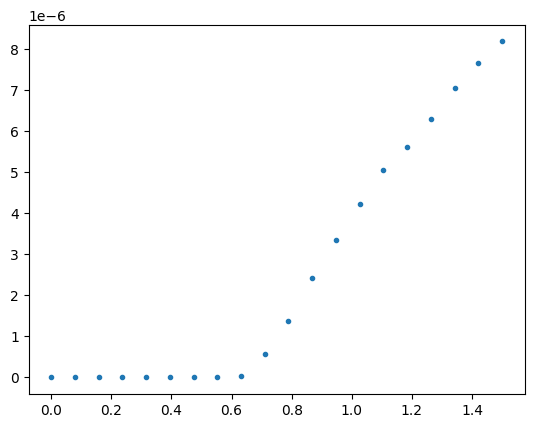

In [44]:
# plot 
plt.plot(vg_sweep_range, I_ds, '.')
plt.show()

In [36]:
# SAVE DATA
#data_5_1 = [vg_sweep_range, np.asarray(I_ds)]
#np.save('./data/data_5_1', data_5_1)

import numpy as np
import matplotlib.pyplot as plt
# LOAD DATA
vg_sweep_range, I_ds = np.load('./data/data_5_1.npy')

In [ ]:
# if the data looks nice, save it!

...


# example :
# Lab2_data_nFETVgIds_Omic = [Vg_n,Is_n]
# save to csv file
# np.savetxt('./data/Lab2_data_nFETVgIds.csv', Lab2_data_nFETVgIds_Omic, delimiter=',')

In [ ]:
# Load data you saved and plot, to check if the data is saved correctly or not



# example :
# Vgn_save, Isn_save = np.loadtxt('./data/Lab2_data_nFETVgIds.csv',delimiter=",")
#plt.rcParams.update({'font.size': 14})
#plt.plot(Vgn_save, Isn_save, '.k')
#plt.xlabel('Vg(V)')
#plt.ylabel('Ids(A)')
#plt.grid()
#plt.show()

In [37]:
# extract the valid range
low = 8
high = 19

vg_sweep_range_ = vg_sweep_range[low:high]
I_ds_ = I_ds[low:high]


1.0027965208792008e-05 -6.325683595129946e-06


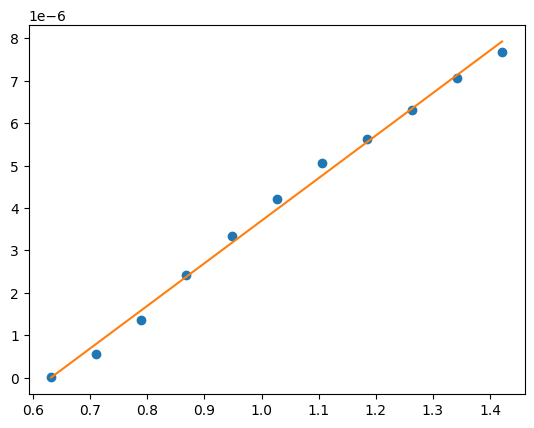

In [38]:
# fit in the valid range (you may want to go back and add the fitted line in the plot)
m, b = np.polyfit(vg_sweep_range_, I_ds_, 1)

f = lambda x : m*x + b

print(m, b)

plt.plot(vg_sweep_range_, I_ds_, 'o')
plt.plot(vg_sweep_range_, f(vg_sweep_range_))
plt.show()

**(c)** Determine $V_{T0}$ and $\beta$ for both devices by fitting your data to the expression derived in the prelab

In [39]:
# V_T0
v_t0 = -b/m
print("The measured treshold voltage of NMOS is {} V".format(v_t0))

The measured treshold voltage of NMOS is 0.6308043021114502 V


In [40]:
# beta => m/Vd
vd = 0.05

betan = m/vd

print("The measured beta of nmos is {} 1/V".format(betan))

The measured beta of nmos is 0.00020055930417584014 1/V


## 5.2 P-FET

**(a)** Configure the chip following [Section 4.3](#config_pfet) if you haven't

**(b)** Measure $I_{ds}$ as a function of $V_g$ in ohmic region

* What will be the fixed value for bulk, source and drain voltages?

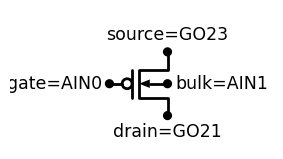

In [13]:
# uses schemdraw, you may have to install it in order to run it on your PC
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()
Q = d.add(elm.PFet, reverse=True, bulk=True)
d.add(elm.Dot, xy=Q.gate, lftlabel='gate=AIN0')
d.add(elm.Dot, xy=Q.bulk, rgtlabel='bulk=AIN1')
d.add(elm.Dot, xy=Q.drain, botlabel='drain=GO21')
d.add(elm.Dot, xy=Q.source, toplabel='source=GO23')
d.draw()

In [14]:
# Configure PFET, set the input voltage demultiplexer by AER event.


In [58]:
# set bulk voltage

p.set_voltage(pyplane.DacChannel.AIN1, 1.8)
Vb_p = p.get_set_voltage(pyplane.DacChannel.AIN1)
print("The bulk voltage is set to {} V".format(Vb_p))

time.sleep(0.05)  # wait for it to settle


# set source voltage
p.set_voltage(pyplane.DacChannel.GO23, 1.8)
Vs_p = p.get_set_voltage(pyplane.DacChannel.GO23)
print("The source voltage is set to {} V".format(Vs_p))
time.sleep(0.1)  # wait 0.1s for it to settle

# set drain voltage
p.set_voltage(pyplane.DacChannel.GO21, 1.6)
Vd_p = p.get_set_voltage(pyplane.DacChannel.GO21)
print("The drain voltage is set to {} V".format(Vd_p))
time.sleep(0.1)  # wait for it to settle


# Print I_ds for checking 

Is_p = p.read_current(pyplane.AdcChannel.GO21_N)
print("The measured source current of PMOS is {} A".format(Is_p))

The bulk voltage is set to 1.7982406616210938 V
The source voltage is set to 1.7982406616210938 V
The drain voltage is set to 1.5994136333465576 V
The measured source current of PMOS is 5.761718966823537e-06 A


* For very close voltages, you may want to call `get_set_voltage` to check the actual output of the DAC.

In [59]:
# get set voltage
Vs_p = p.get_set_voltage(pyplane.DacChannel.GO23)
print("The source voltage is set to {} V".format(Vs_p))

time.sleep(0.1)  # wait for it to settle

# get set voltage
Vd_p = p.get_set_voltage(pyplane.DacChannel.GO21)
print("The drain voltage is set to {} V".format(Vd_p))

The source voltage is set to 1.7982406616210938 V
The drain voltage is set to 1.5994136333465576 V


* Data aquisition

In [60]:
# sweep gate voltage

import time
import numpy as np 

# Get the leakage current, Read Ids=Ids0 at Vg = 1.8
p.set_voltage(pyplane.DacChannel.AIN0, 1.8)
time.sleep(0.5) # wait 0.5 second for it to settle
Is0_p = p.read_current(pyplane.AdcChannel.GO21_N)
print("Offset Is0_n: {} A".format(Is0_p))

N_max = 20
vg_sweep_range = np.linspace(0.8, 1.8, N_max)
print(vg_sweep_range)
I_ds = []

for n, vg_sweep in enumerate(vg_sweep_range):
    # set gate voltage
    p.set_voltage(pyplane.DacChannel.AIN0, vg_sweep)

    
    print("The gate voltage is set to {} V".format(vg_sweep))   ## print the gate voltage
    
    time.sleep(0.05)  # wait for it to settle
    # read I_{ds}
    I_ds_tmp = p.read_current(pyplane.AdcChannel.GO21_N)
    
    print("The measured source current is {} A".format(I_ds_tmp))  ## print the raw data
    
    # substract leakage current 
    I_ds.append(I_ds_tmp - Is0_p)

print(vg_sweep, I_ds)

Offset Is0_n: 5.81054700887762e-06 A
[0.8        0.85263158 0.90526316 0.95789474 1.01052632 1.06315789
 1.11578947 1.16842105 1.22105263 1.27368421 1.32631579 1.37894737
 1.43157895 1.48421053 1.53684211 1.58947368 1.64210526 1.69473684
 1.74736842 1.8       ]
The gate voltage is set to 0.8 V
The measured source current is 6.225585821084678e-06 A
The gate voltage is set to 0.8526315789473684 V
The measured source current is 6.176757779030595e-06 A
The gate voltage is set to 0.9052631578947369 V
The measured source current is 6.10351571594947e-06 A
The gate voltage is set to 0.9578947368421054 V
The measured source current is 5.981445156066911e-06 A
The gate voltage is set to 1.0105263157894737 V
The measured source current is 5.932617114012828e-06 A
The gate voltage is set to 1.063157894736842 V
The measured source current is 5.9082030929857865e-06 A
The gate voltage is set to 1.1157894736842104 V
The measured source current is 5.834961029904662e-06 A
The gate voltage is set to 1.1684

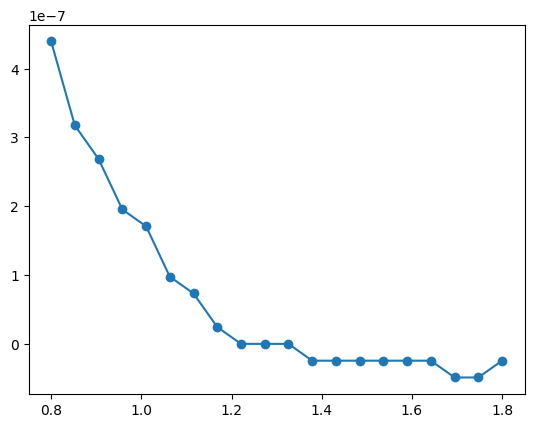

In [62]:
#vg_sweep_range, I_ds = np.load('./data/data_5_2.npy', )
# plot 
plt.plot(vg_sweep_range, I_ds, 'o-')
plt.show()

In [25]:
# if the data looks nice, save it!
# SAVE DATA
#data_5_2 = [vg_sweep_range, np.asarray(I_ds)]
#np.save('./data/data_5_2', data_5_2)

# LOAD DATA
vg_sweep_range, I_ds = np.load('./data/data_5_2.npy')

In [ ]:
# Load data you saved and plot, to check if the data is saved correctly or not


In [28]:
# extract the valid range
vg_sweep_range_ = vg_sweep_range[0:9]
I_ds_ = I_ds[0:9]

-9.895829483260367e-07 1.1763232477177452e-06


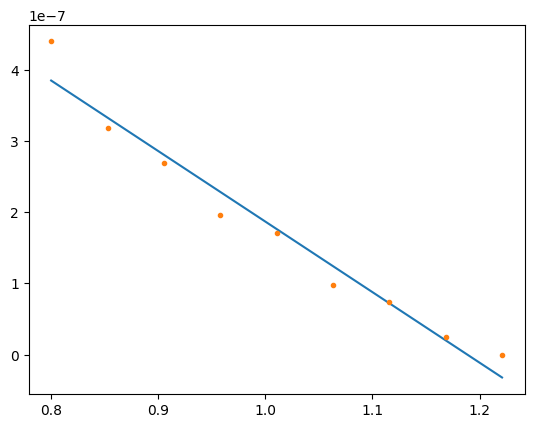

In [29]:
# fit in the valid range (you may want to go back and add the fitted line in the plot)
m, b = np.polyfit(vg_sweep_range_, I_ds_, 1)

g = lambda x : m*x + b

print(m, b)

plt.plot(vg_sweep_range_, g(vg_sweep_range_))
plt.plot(vg_sweep_range_, I_ds_, '.')
plt.show()

**(c)** Determine $V_{T0}$ and $\beta$ for both devices by fitting your data to the expression derived in the prelab

In [32]:
# V_T0
vt0_p = -b/m
print(f"V_T0 = {vt0_p} V")

V_T0 = 1.1887060601717072 V


In [34]:
# beta
vd = 1.6
betap = abs(m)/vd
print('beta of pmos = ',betap)

beta =  6.18489342703773e-07


## 5.3 Comparisons

* Include a single plot showing the curves for both devices.

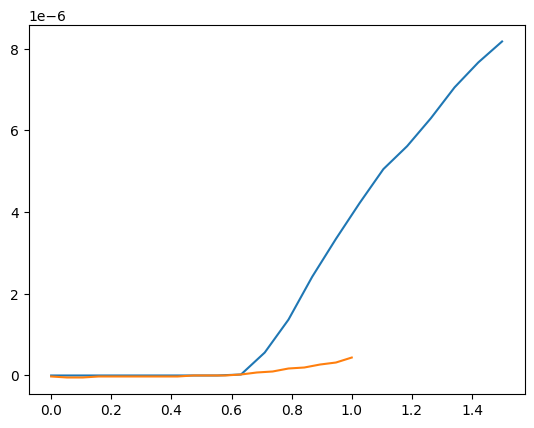

In [45]:
# plot both Ids vs |Vgs|

vg_n, I_ds_n = np.load('./data/data_5_1.npy')
vg_p, I_ds_p = np.load('./data/data_5_2.npy')

vgs_p = abs(vg_p - 1.8)

plt.plot(vg_n, I_ds_n)
plt.plot(vgs_p, I_ds_p)
plt.show()

* What is the ratio between $\beta$ for the 2 devices? Does it make sense?

In [41]:
betan/betap

324.2728537553775

* Is the relationship between $I_{ds}$ and $V_{gs}-V_T$ really linear? What is likely the cause of any discrepancy?

## 5.4 Effective surface mobility (optional)

Hint: Use the $V_{T0}$ you obtained in the last experiments but assume $\beta$ changes with $V_{gs}$ (thus $\mu_n$ and $\mu_p$ changes). **No need to measure again.**

In [ ]:
# plot mu vs Vgs for both devices in the same figure

- Why does the mobility peak and then decay instead of remaining constant? 

- What is the ratio between the peak mobilities for electrons and holes?

- How different are these values from the bulk mobilities for electrons (1350 ${\rm cm^2/V/s}$) and holes (480 ${\rm cm^2/V/s}$)? 

# 6 Drain Current in the saturation region

In this experiment you will characterize the _quadratic_ dependence of the current on the gate
voltage in the saturation region. 

## 6.1 N-FET

**(a)** Configure the chip following [Section 4.2](#config_nfet) if you haven't

**(b)** Measure $I_{ds}$ as a function of $V_g$ in saturation region

* What will be the fixed value for source and drain voltages?

In [ ]:
## configure NMOS by AER event


In [46]:
# set source voltage

vs = 0.0
p.set_voltage(pyplane.DacChannel.GO20,vs)       
print("The source voltage is set to {} V".format(vs))

The source voltage is set to 0.0 V


In [47]:
# set drain voltage     #######1.8

vd = 1.8
p.set_voltage(pyplane.DacChannel.GO22,vd)       
print("The source voltage is set to {} V".format(vd))

The source voltage is set to 1.8 V


* Data aquisition

In [48]:
# sweep gate voltage
import time
import numpy as np 

# Get the leakage current, Read Ids=Ids0 at Vg = 0
p.set_voltage(pyplane.DacChannel.AIN0, 0)
time.sleep(0.5) # wait 0.5 second for it to settle
Is0_n = p.read_current(pyplane.AdcChannel.GO20_N) #REMEMBER: reading from source is pin AdcChannel.GO20_N
print("Offset Is0_n: {} A".format(Is0_n))

N_max = 20
vg_sweep_range = np.linspace(0.0, 1.8, N_max)
print(vg_sweep_range)
I_ds = []

for n, vg_sweep in enumerate(vg_sweep_range):
    # set gate voltage
    p.set_voltage(pyplane.DacChannel.AIN0, vg_sweep)

    
    print("The gate voltage is set to {} V".format(vg_sweep))   ## print the gate voltage
    
    time.sleep(0.05)  # wait for it to settle
    # read I_{ds}
    I_ds_tmp = p.read_current(pyplane.AdcChannel.GO20_N)
    
    print("The measured source current is {} A".format(I_ds_tmp))  ## print the raw data
    
    # substract leakage current 
    I_ds.append(I_ds_tmp - Is0_n)

print(vg_sweep, I_ds)

Offset Is0_n: 2.19726558725597e-07 A
[0.         0.09473684 0.18947368 0.28421053 0.37894737 0.47368421
 0.56842105 0.66315789 0.75789474 0.85263158 0.94736842 1.04210526
 1.13684211 1.23157895 1.32631579 1.42105263 1.51578947 1.61052632
 1.70526316 1.8       ]
The gate voltage is set to 0.0 V
The measured source current is 2.4414063659605745e-07 A
The gate voltage is set to 0.09473684210526316 V
The measured source current is 2.685546860448085e-07 A
The gate voltage is set to 0.18947368421052632 V
The measured source current is 2.4414063659605745e-07 A
The gate voltage is set to 0.28421052631578947 V
The measured source current is 2.4414063659605745e-07 A
The gate voltage is set to 0.37894736842105264 V
The measured source current is 2.4414063659605745e-07 A
The gate voltage is set to 0.4736842105263158 V
The measured source current is 2.4414063659605745e-07 A
The gate voltage is set to 0.5684210526315789 V
The measured source current is 2.685546860448085e-07 A
The gate voltage is set

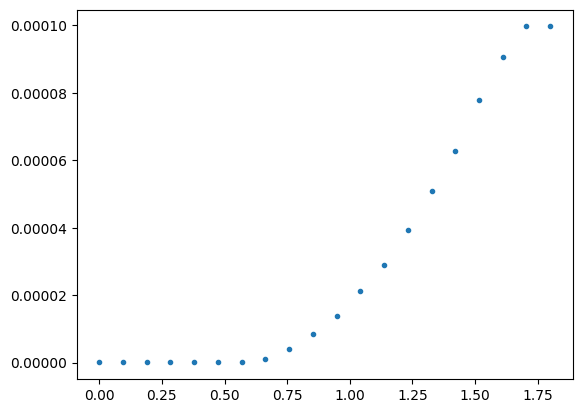

In [49]:
# plot 
plt.plot(vg_sweep_range, I_ds, '.')
plt.show()

In [50]:
# if the data looks nice, save it!
# SAVE DATA
data_6_1 = [vg_sweep_range, np.asarray(I_ds)]
np.save('./data/data_6_1', data_6_1)

# LOAD DATA
#vg_sweep_range, I_ds = np.load('./data/data_6_1.npy')

In [ ]:
# extract the valid range and plot sqrt(Ids) vs Vgs


In [ ]:
# fit in the valid range (you may want to go back and add the fitted line in the plot)


**(c)** Determine $V_{T0}$ and $\beta$ for both devices by fitting your data to the expression derived in the prelab

In [ ]:
# V_T0 

print('V_T0 = ', ... )

In [ ]:
# beta
betan = 
print('beta = ',betan)

## 6.2 P-FET

**(a)** Configure the chip following [Section 4.3](#config_pfet) if you haven't

**(b)** Measure $I_{ds}$ as a function of $V_g$ in ohmic region

* What will be the fixed value for bulk, source and drain voltages?

In [ ]:
## configure PMOS by AER event


In [63]:
# set bulk voltage

p.set_voltage(pyplane.DacChannel.AIN1, 1.8)
Vb_p = p.get_set_voltage(pyplane.DacChannel.AIN1)
print("The bulk voltage is set to {} V".format(Vb_p))

time.sleep(0.05)  # wait for it to settle


# set source voltage
p.set_voltage(pyplane.DacChannel.GO23, 1.8)
Vs_p = p.get_set_voltage(pyplane.DacChannel.GO23)
print("The source voltage is set to {} V".format(Vs_p))
time.sleep(0.1)  # wait 0.1s for it to settle

# set drain voltage
p.set_voltage(pyplane.DacChannel.GO21, 0.9)
Vd_p = p.get_set_voltage(pyplane.DacChannel.GO21)
print("The drain voltage is set to {} V".format(Vd_p))
time.sleep(0.1)  # wait for it to settle


# Print I_ds for checking 

Is_p = p.read_current(pyplane.AdcChannel.GO21_N)
print("The measured source current of PMOS is {} A".format(Is_p))

The bulk voltage is set to 1.7982406616210938 V
The source voltage is set to 1.7982406616210938 V
The drain voltage is set to 0.8991203308105469 V
The measured source current of PMOS is 3.686523541546194e-06 A


* Data aquisition

In [64]:
# sweep gate voltage
# sweep gate voltage

import time
import numpy as np 

# Get the leakage current, Read Ids=Ids0 at Vg = 1.8
p.set_voltage(pyplane.DacChannel.AIN0, 1.8)
time.sleep(0.5) # wait 0.5 second for it to settle
Is0_p = p.read_current(pyplane.AdcChannel.GO21_N)
print("Offset Is0_n: {} A".format(Is0_p))

N_max = 20
vg_sweep_range = np.linspace(0.8, 1.8, N_max)
print(vg_sweep_range)
I_ds = []

for n, vg_sweep in enumerate(vg_sweep_range):
    # set gate voltage
    p.set_voltage(pyplane.DacChannel.AIN0, vg_sweep)

    
    print("The gate voltage is set to {} V".format(vg_sweep))   ## print the gate voltage
    
    time.sleep(0.05)  # wait for it to settle
    # read I_{ds}
    I_ds_tmp = p.read_current(pyplane.AdcChannel.GO21_N)
    
    print("The measured source current is {} A".format(I_ds_tmp))  ## print the raw data
    
    # substract leakage current 
    I_ds.append(I_ds_tmp - Is0_p)

print(vg_sweep, I_ds)

Offset Is0_n: 3.686523541546194e-06 A
[0.8        0.85263158 0.90526316 0.95789474 1.01052632 1.06315789
 1.11578947 1.16842105 1.22105263 1.27368421 1.32631579 1.37894737
 1.43157895 1.48421053 1.53684211 1.58947368 1.64210526 1.69473684
 1.74736842 1.8       ]
The gate voltage is set to 0.8 V
The measured source current is 5.4931642807787284e-06 A
The gate voltage is set to 0.8526315789473684 V
The measured source current is 4.687500222644303e-06 A
The gate voltage is set to 0.9052631578947369 V
The measured source current is 4.174804871581728e-06 A
The gate voltage is set to 0.9578947368421054 V
The measured source current is 3.979492248618044e-06 A
The gate voltage is set to 1.0105263157894737 V
The measured source current is 3.8330076677084435e-06 A
The gate voltage is set to 1.063157894736842 V
The measured source current is 3.7841796256543603e-06 A
The gate voltage is set to 1.1157894736842104 V
The measured source current is 3.7109375625732355e-06 A
The gate voltage is set to 1

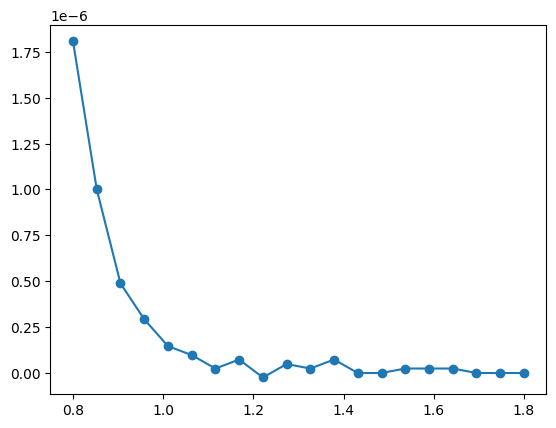

In [65]:

# plot 
plt.plot(vg_sweep_range, I_ds, 'o-')
plt.show()

In [66]:
# if the data looks nice, save it!
# if the data looks nice, save it!
# SAVE DATA
data_6_2 = [vg_sweep_range, np.asarray(I_ds)]
np.save('./data/data_6_2', data_6_2)

# LOAD DATA
#vg_sweep_range, I_ds = np.load('./data/data_6_2.npy')

In [ ]:
# extract the valid range and plot sqrt(Ids) vs Vgs


In [ ]:
# fit in the valid range (you may want to go back and add the fitted line in the plot)


**(c)** Determine $V_{T0}$ and $\beta$ for both devices by fitting your data to the expression derived in the prelab

In [ ]:
# V_T0


In [ ]:
# beta


## 6.3 Comparisons

* Are the measurements of $V_{T0}$ and $\beta$ from the saturation measurement consistent with the values obtained in the ohmic region? 

* Which is a better approximation, the linear one or the quadratic?

# 7 Early effect

This experiment studies how Early voltage scales with transistor current; in particular, how valid are the simple assumptions about channel length modulation?

**You only need to do N-FET**

**(a)** Measure $I_{ds}$ vs $V_{ds}$ for different $V_{gs}$

In [15]:
### AER to configure NMOS
import numpy as np

In [16]:
# set source voltage

vs = 0.0
p.set_voltage(pyplane.DacChannel.GO20,vs)       
print("The source voltage is set to {} V".format(vs))

The source voltage is set to 0.0 V


In [33]:
# Measurement. You may need two 'for' loops (one nested loop) to sweep Vgs and Vds
N = 20
Vds_range = np.linspace(0.0, 1.8, N)
print(type(Vds_range))
Vgs_range = np.array([0.8, 1, 1.2, 1.4, 1.7])
print(type(Vgs_range))
p.set_voltage(pyplane.DacChannel.AIN0, 0)
Is0_n = p.read_current(pyplane.AdcChannel.GO20_N) #REMEMBER: reading from source is pin AdcChannel.GO20_N
I_ds = np.zeros((len(Vgs_range), N))
print(type(I_ds))

for i, Vgs in enumerate(Vgs_range):
    p.set_voltage(pyplane.DacChannel.AIN0, Vgs)
    for j, Vds in enumerate(Vds_range):
        p.set_voltage(pyplane.DacChannel.GO22, Vds)       
        print("The drain voltage is set to {} V".format(Vds))
        time.sleep(0.05)  # wait for it to settle
        # read I_{ds}
        I_ds_tmp = p.read_current(pyplane.AdcChannel.GO20_N)

        print("The measured source current is {} A".format(I_ds_tmp))  ## print the raw data

        # substract leakage current 
        #I_tmp.append(I_ds_tmp - Is0_n)
        I_ds[i][j] = I_ds_tmp - Is0_n
    
    #I_ds.append(I_tmp)

print(I_ds)



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
The drain voltage is set to 0.0 V
The measured source current is 2.4414063659605745e-07 A
The drain voltage is set to 0.09473684210526316 V
The measured source current is 3.5644532090373104e-06 A
The drain voltage is set to 0.18947368421052632 V
The measured source current is 5.2001951189595275e-06 A
The drain voltage is set to 0.28421052631578947 V
The measured source current is 5.2001951189595275e-06 A
The drain voltage is set to 0.37894736842105264 V
The measured source current is 5.151367076905444e-06 A
The drain voltage is set to 0.4736842105263158 V
The measured source current is 5.66406242796802e-06 A
The drain voltage is set to 0.5684210526315789 V
The measured source current is 5.7861329878505785e-06 A
The drain voltage is set to 0.6631578947368422 V
The measured source current is 5.981445156066911e-06 A
The drain voltage is set to 0.7578947368421053 V
The measured source current is 5.346679699869128e-06 A

* Include a single plot showing all data on a semilogy plot.

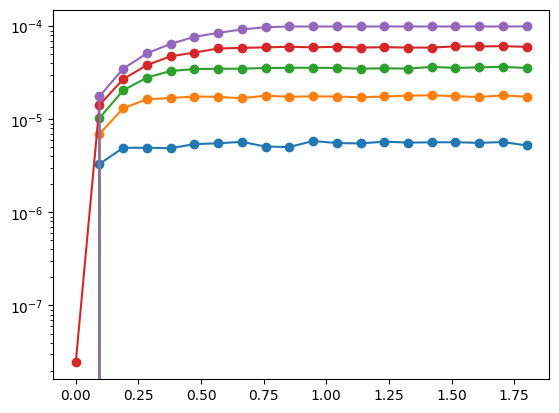

In [91]:
# plot
Vds_range, Vgs_range, I_ds = np.load('./data/data_7.npy', allow_pickle=True)

for I_ds_i in I_ds:
    plt.semilogy(Vds_range, I_ds_i, '-o',)
plt.show()

In [73]:
# if the data looks nice, save it!
# if the data looks nice, save it!
# SAVE DATA
data_7 = [Vds_range, Vgs_range, I_ds]
#np.save('./data/data_7', data_7)
# LOAD DATA


* Can you see how the saturation voltage increases with the gate overdrive $V_G-V_T$ in strong inversion?

$I_d = const$ when $V_d$ reaches overdrive voltage $V_g - V_T$. Since overdrive depends on Vg, it increases if Vg increases. We can indeed see on the graph that the saturation voltage for drain moves to the right as the gate voltage increases.



**(b)** Compute the Early voltage 

* Fit a line to the ”flat” part of each curve. Select a range of drain voltages to fit the line and use the same range for each curve, because the Early effect is actually curved in reality, and what you are actually seeing is the start of Drain Induced Barrier Lowering (DIBL) or impact ionization.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


8
1.5032707391650714e-07
5.890376121021314e-07
1.9695938583084734e-06
2.303995186006877e-06
-1.5343897440042188e-08


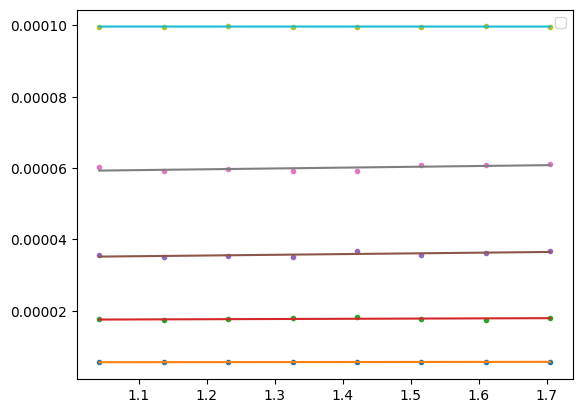

In [188]:
low = 11
high = -1

Vds_range_ = Vds_range[low:high]
Vgs_range_ = Vgs_range[low:high]
I_ds_ = I_ds[:, low:high]

print(len(Vds_range[low:high]))

functions = []


m0, b0 = np.polyfit(Vds_range_, I_ds_[0], 1) # Linear fit f(Vd) = m*Vd + b 
f0 = lambda vd : m0*vd + b0
print(m0)

m1, b1 = np.polyfit(Vds_range_, I_ds_[1], 1) # Linear fit f(Vd) = m*Vd + b 
f1 = lambda vd : m1*vd + b1
print(m1)

m2, b2 = np.polyfit(Vds_range_, I_ds_[2], 1) # Linear fit f(Vd) = m*Vd + b 
f2 = lambda vd : m2*vd + b2
print(m2)

m3, b3 = np.polyfit(Vds_range_, I_ds_[3], 1) # Linear fit f(Vd) = m*Vd + b 
f3 = lambda vd : m3*vd + b3
print(m3)

m4, b4 = np.polyfit(Vds_range_, I_ds_[4], 1) # Linear fit f(Vd) = m*Vd + b 
f4 = lambda vd : m4*vd + b4
print(m4)

f = [f0, f1, f2, f3, f4]
m = [m0, m1, m2, m3, m4]


for i, fn in enumerate(f):
    label = f"{m[i]}"
    plt.plot(Vds_range_, I_ds_[i], '.')    
    plt.plot(Vds_range_, fn(Vds_range_))

plt.legend()
plt.show()
    


* Plot the Early voltage vs drain current on a semilogx scale.

In [189]:
data = [-b0/m0, -b1/m1, -b2/m2, -b3/m3, -b4/m4]
print(data)

[-36.16246973021402, -28.748195614583157, -16.82288138144996, -24.69479294921306, 6496.545920907069]


* Comment on your results: How constant is the Early voltage with drain current? Speculate on the reasons for your observations.

# 8 Congratulations

**If you did everything in this lab, you have done a lot! This is probably the most difficult but also one of the most important labs, because practical and intuitive knowledge of transistor characteristics is crucial in understanding and synthesizing new circuits.**

# 9 What we expect

How transistors work above threshold.  

What is the linear or triode region and what is the saturation region?

How does the linear region depend on gate and threshold voltage?

What is the _overdrive_?

What is the specific current?

How the Early effect comes about?

Typical values for Early voltage.

How to sketch graphs of transistor current vs gate voltage and drain-source voltage.

How above-threshold transistors go into saturation and why the saturation voltage is equal to the gate overdrive.
Can you write the above-threshold current equations?

How does above-threshold current depend on $W/L$, $C_{ox}$, and mobility $\mu$?

How do transconductance and drain resistance combine to generate voltage gain? 
And what is the intrinsic voltage gain of a transistor?

What effect does velocity saturation have on transistor operation, specifically, how does it change the relation between saturation current and gate voltage? What is DIBL (drain induced barrier lowering) and II (impact ionization)?

What is the dominant source of mismatch?

How does transistor mismatch scale with transistor size?

What are typical values of transistor threshold voltage mismatch? 